
Solution 1-


The merged table after removing all missing values is-

   Country/ States/ Union Territories Name  \
0                                    India   
1                           Andhra Pradesh   
2                        Arunachal Pradesh   
3                                    Assam   
4                                    Bihar   
5                             Chhattisgarh   
6                                      Goa   
7                                  Gujarat   
8                                  Haryana   
9                         Himachal Pradesh   
10                         Jammu & Kashmir   
11                               Jharkhand   
12                               Karnataka   
13                                  Kerala   
14                          Madhya Pradesh   
15                             Maharashtra   
16                                 Manipur   
17                               Meghalaya   
18                                 Mizoram   
19       


 Top 5 states/union territories that are representative of India after normalizing data are:
Chhattisgarh
Karnataka
Maharashtra
Uttar Pradesh
Rajasthan

Solution 3-

Pearson's Correlation Matrix-

                                                    Child sex ratio in population (0-6 age group) - Total - 2001  \
Child sex ratio in population (0-6 age group) -...                                           1.000000              
Child sex ratio in population (0-6 age group) -...                                           0.857419              
Child sex ratio in population (0-6 age group) -...                                           0.977564              
Child sex ratio in population (0-6 age group) -...                                           0.854505              
Child sex ratio in population (0-6 age group) -...                                           0.866391              
Child sex ratio in population (0-6 age group) -...                                           0.743110     


Solution 4


The two most important attributes in Demography are

Child sex ratio in population (0-6 age group) - Urban - 2001
Child sex ratio in population (0-6 age group) - Urban - 2011

The two most important attributes in Economy are

gdpcpgr 2016-17
ndpcpgr 2016-17

The two most important attributes in Education are

cSec_Only 2013-14
cU_Primary_Only 2015-16

The two most important features across categories are

gdpcpgr 2016-17
ndpcpgr 2016-17

Solution 5



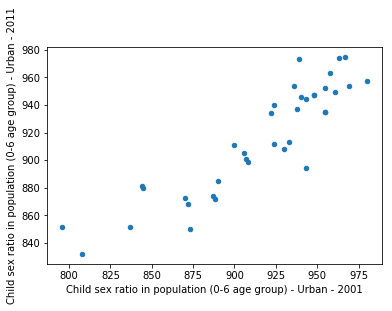

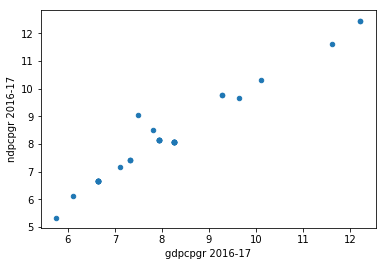

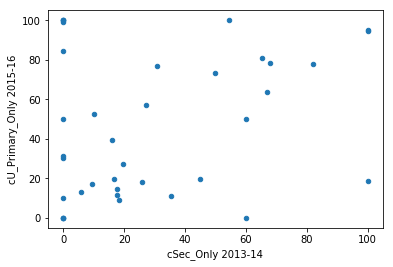

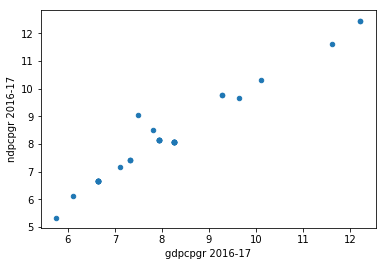

In [182]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import pandas as pd
from pandas import read_csv
import math
from scipy.spatial import distance
from random import randint
import matplotlib
import scipy.stats as stats
import pylab

mergedFile = read_csv('Demography/child-sex-ratio-0-6-years.csv', header=0)
tempFile= read_csv('Demography/decadal-growth-rate.csv', header=0)
mergedFile=pd.merge(mergedFile,tempFile)
tempFile= read_csv('Demography/sex-ratio.csv', header=0)
mergedFile=pd.merge(mergedFile,tempFile)
#add row of Telangana and distributing data between Andhra Pradesh and Telangana in 1:4 ratio
mergedFile.loc[36]=["State","Telangana","NA","NA","NA","NA","NA","NA","NA","NA","NA","NA","NA","NA","NA","NA","NA","NA","NA","NA"]
mergedFile.iloc[36,2:20]=(mergedFile.iloc[1,2:20]).values

#####

tempFile=read_csv('Economy/gross-domestic-product-gdp-constant-price.csv',header=0)
tempFile=tempFile.rename(columns={"Andhra Pradesh ":"Andhra Pradesh","West Bengal1":"West Bengal","All_India GDP":"India","Delhi":"NCT of Delhi"})
tempFile=tempFile.drop(columns="Items Description",index=11)
#dropping unnecessary column "Category" of mergedFile
mergedFile=mergedFile.drop(columns="Category")
mergedFile.iloc[0,0]="India"
#(mergedFile)
#naming each year interval as gdp constant price or gdp constant price growth rate
for i in range(0,6):
    tempFile.loc[i,"Duration"]="gdpcp "+tempFile.loc[i,"Duration"]
for i in range(6,11):
    tempFile.loc[i,"Duration"]="gdpcpgr "+tempFile.loc[i,"Duration"]
tempFile=tempFile.transpose()
tempFile=tempFile.reset_index(level=0)
#tempFile=tempFile.rename_axis(list(tempFile.loc[0,:]),axis=1)
tempFile=tempFile.rename(columns=tempFile.loc[0,:])
tempFile=tempFile.drop(index=0)
tempFile=tempFile.rename(columns={"Duration":"Country/ States/ Union Territories Name"})
mergedFile=pd.merge(mergedFile,tempFile,how='left')

##########

tempFile=read_csv('Economy/gross-domestic-product-gdp-current-price.csv',header=0)
tempFile=tempFile.rename(columns={"Andhra Pradesh ":"Andhra Pradesh","West Bengal1":"West Bengal","All_India GDP":"India","Delhi":"NCT of Delhi"})
tempFile=tempFile.drop(columns="Items  Description")
#dropping unnecessary column "Category" of mergedFile
#(mergedFile)
#naming each year interval as gdp current price or gdp current price growth rate
for i in range(0,6):
    tempFile.loc[i,"Duration"]="gdpcup "+tempFile.loc[i,"Duration"]
for i in range(6,11):
    tempFile.loc[i,"Duration"]="gdpcupgr "+tempFile.loc[i,"Duration"]
tempFile=tempFile.transpose()
tempFile=tempFile.reset_index(level=0)
#tempFile=tempFile.rename_axis(list(tempFile.loc[0,:]),axis=1)
tempFile=tempFile.rename(columns=tempFile.loc[0,:])
tempFile=tempFile.drop(index=0)
tempFile=tempFile.rename(columns={"Duration":"Country/ States/ Union Territories Name"})
mergedFile=pd.merge(mergedFile,tempFile,how='left')

######

tempFile=read_csv('Economy/state-wise-net-domestic-product-ndp-constant-price.csv',header=0)
tempFile=tempFile.rename(columns={"Andhra Pradesh ":"Andhra Pradesh","West Bengal1":"West Bengal","All_India NDP":"India","Delhi":"NCT of Delhi"})
tempFile=tempFile.drop(columns="Item Description",index=11)
#dropping unnecessary column "Category" of mergedFile
#(mergedFile)
#naming each year interval as gdp current price or gdp current price growth rate
for i in range(0,6):
    tempFile.loc[i,"Duration"]="ndpcp "+tempFile.loc[i,"Duration"]
for i in range(6,11):
    tempFile.loc[i,"Duration"]="ndpcpgr "+tempFile.loc[i,"Duration"]
tempFile=tempFile.transpose()
tempFile=tempFile.reset_index(level=0)
#tempFile=tempFile.rename_axis(list(tempFile.loc[0,:]),axis=1)
tempFile=tempFile.rename(columns=tempFile.loc[0,:])
tempFile=tempFile.drop(index=0)
tempFile=tempFile.rename(columns={"Duration":"Country/ States/ Union Territories Name"})
mergedFile=pd.merge(mergedFile,tempFile,how='left')

#print(tempFile)


######

tempFile=read_csv('Economy/state-wise-net-domestic-product-ndp-current-price.csv',header=0)
tempFile=tempFile.rename(columns={"Andhra Pradesh ":"Andhra Pradesh","West Bengal1":"West Bengal","All_India NDP":"India","Delhi":"NCT of Delhi"})
tempFile=tempFile.drop(columns="Item Description",index=11)
#dropping unnecessary column "Category" of mergedFile
#(mergedFile)
#naming each year interval as gdp current price or gdp current price growth rate
for i in range(0,6):
    tempFile.loc[i,"Duration"]="ndpcup "+tempFile.loc[i,"Duration"]
for i in range(6,11):
    tempFile.loc[i,"Duration"]="ndpcupgr "+tempFile.loc[i,"Duration"]
tempFile=tempFile.transpose()
tempFile=tempFile.reset_index(level=0)
#tempFile=tempFile.rename_axis(list(tempFile.loc[0,:]),axis=1)
tempFile=tempFile.rename(columns=tempFile.loc[0,:])
tempFile=tempFile.drop(index=0)
tempFile=tempFile.rename(columns={"Duration":"Country/ States/ Union Territories Name"})
mergedFile=pd.merge(mergedFile,tempFile,how='left')
mergedFile=mergedFile.replace(to_replace=np.nan,value="NA")

######

tempFile=read_csv('Education/drop-out-rate.csv',header=0)
tempFile.loc[0,"Upper Primary_Boys"]="NR"
tempFile=tempFile.replace(to_replace="NR",value="NA")
#dividing data in Andhra Pradesh and Telangana in 1:4 ratio based on population
tempFile=pd.DataFrame(np.insert(tempFile.values, 93, values=["Telangana","2012-13","NA","NA","NA","NA","NA","NA","NA","NA","NA","NA","NA","NA"], axis=0))
#tempFile.iloc[3,2:13]=(tempFile.iloc[3,2:13]).convert_objects(convert_numeric=True)
#tempFile.iloc[3,2:14]=pd.to_numeric(tempFile.iloc[3,2:14],errors='coerce')
tempFile.iloc[93,2:14]=((tempFile.iloc[3,2:14]).values)

#mergedFile.iloc[36,2:20]=(5/12)*(mergedFile.iloc[1,2:20]).values
#create a new dataframe
temp1=pd.DataFrame(columns=["Country/ States/ Union Territories Name","Primary_Boys 2012-2013","Primary_Boys 2013-2014","Primary_Boys 2014-2015","Primary_Girls 2012-2013","Primary_Girls 2013-2014","Primary_Girls 2014-2015","Primary_Total 2012-2013","Primary_Total 2013-2014","Primary_Total 2014-2015","Upper_Primary_Boys 2012-2013","Upper_Primary_Boys 2013-2014","Upper_Primary_Boys 2014-2015","Upper_Primary_Girls 2012-2013","Upper_Primary_Girls 2013-2014","Upper_Primary_Girls 2014-2015","Upper_Primary_Total 2012-2013","Upper_Primary_Total 2013-2014","Upper_Primary_Total 2014-2015","Secondary_Boys 2012-2013","Secondary_Boys 2013-2014","Secondary_Boys 2014-2015","Secondary_Girls 2012-2013","Secondary_Girls 2013-2014","Secondary_Girls 2014-2015","Secondary_Total 2012-2013","Secondary_Total 2013-2014","Secondary_Total 2014-2015","HrSecondary_Boys 2012-2013","HrSecondary_Boys 2013-2014","HrSecondary_Boys 2014-2015","HrSecondary_Girls 2012-2013","HrSecondary_Girls 2013-2014","HrSecondary_Girls 2014-2015","HrSecondary_Total 2012-2013","HrSecondary_Total 2013-2014","HrSecondary_Total 2014-2015"])
k=0;
temp1.loc[:,"Country/ States/ Union Territories Name"]=mergedFile.loc[:,"Country/ States/ Union Territories Name"]

temp1=temp1.replace(to_replace="NCT of Delhi",value="Delhi")
temp1=temp1.sort_values(by=["Country/ States/ Union Territories Name"])
temp1=temp1.drop(index=0)
temp1=temp1.reset_index(level=0,drop='true')
temp1.loc[36,"Country/ States/ Union Territories Name"]="India"
tem=tempFile.loc[6,:]
tempFile=tempFile.drop(index=6)
tempFile=pd.DataFrame(np.insert(tempFile.values, 7, values=tem,axis=0))
#print(tempFile)

for i in range(0,37):
    rowind=i*3
    colind=2
    for j in range(1,37):
        temp1.iloc[i,j]=tempFile.iloc[rowind,colind]
        rowind+=1
        if(j%3==0):
            colind+=1
            rowind=i*3
temp1=temp1.replace(to_replace="Delhi",value="NCT of Delhi")
#tempFile=tempFile.replace(to_replace="Delhi",value="NCT of Delhi")
#tempFile=tempFile.sort_values(by=["Country/ States/ Union Territories Name","year"])
#tempFile=tempFile.reset_index(level=0,drop='true')
mergedFile=pd.merge(mergedFile,temp1,how='left')
##########

tempFile=read_csv('Education/gross-enrolment-ratio-higher-education.csv',header=0)
tempFile=tempFile.replace(to_replace="Delhi",value="NCT of Delhi")
tempFile=tempFile.replace(to_replace="All India",value="India")
tempFile=tempFile.replace(to_replace="Andaman & Nicobar Islands",value="A & N Islands")
tempFile=tempFile.sort_values(by=["Country/ State/ UT Name","Year"])
tempFile=tempFile.reset_index(level=0,drop='true')
tempFile=pd.DataFrame(np.insert(tempFile.values, 192, values=["2010-11","Telangana","NA","NA","NA","NA","NA","NA","NA","NA","NA"], axis=0))
tempFile=pd.DataFrame(np.insert(tempFile.values, 193, values=["2011-12","Telangana","NA","NA","NA","NA","NA","NA","NA","NA","NA"],axis=0))

#tempFile.iloc[6,2:11]=pd.to_numeric(tempFile.iloc[6,2:11],errors='coerce')
tempFile.iloc[192,2:11]=((tempFile.iloc[6,2:11]).values)
#tempFile.iloc[7,2:11]=pd.to_numeric(tempFile.iloc[7,2:11],errors='coerce')
tempFile.iloc[193,2:11]=((tempFile.iloc[7,2:11]).values)

temp1=pd.DataFrame(columns=["Country/ States/ Union Territories Name","All Categories - Male 2010-11","All Categories - Male 2011-12","All Categories - Male 2012-13","All Categories - Male 2013-14","All Categories - Male 2014-15","All Categories - Male 2015-16","All Categories - Female 2010-11","All Categories - Female 2011-12","All Categories - Female 2012-13","All Categories - Female 2013-14","All Categories - Female 2014-15","All Categories - Female 2015-16","All Categories - Total 2010-11","All Categories - Total 2011-12","All Categories - Total 2012-13","All Categories - Total 2013-14","All Categories - Total 2014-15","All Categories - Total 2015-16","SC - Male 2010-11","SC - Male 2011-12","SC - Male 2012-13","SC - Male 2013-14","SC - Male 2014-15","SC - Male 2015-16","SC - Female 2010-11","SC - Female 2011-12","SC - Female 2012-13","SC - Female 2013-14","SC - Female 2014-15","SC - Female 2015-16","SC - Total 2010-11","SC - Total 2011-12","SC - Total 2012-13","SC - Total 2013-14","SC - Total 2014-15","SC - Total 2015-16","ST - Male 2010-11","ST - Male 2011-12","ST - Male 2012-13","ST - Male 2013-14","ST - Male 2014-15","ST - Male 2015-16","ST - Female 2010-11","ST - Female 2011-12","ST - Female 2012-13","ST - Female 2013-14","ST - Female 2014-15","ST - Female 2015-16","ST - Total 2010-11","ST - Total 2011-12","ST - Total 2012-13","ST - Total 2013-14","ST - Total 2014-15","ST - Total 2015-16"])
temp1.loc[:,"Country/ States/ Union Territories Name"]=mergedFile.loc[:,"Country/ States/ Union Territories Name"]
temp1=temp1.sort_values(by="Country/ States/ Union Territories Name")
temp1=temp1.reset_index(level=0,drop='true')

for i in range(0,37):
    rowind=i*6
    colind=2
    for j in range(1,55):
        temp1.iloc[i,j]=tempFile.iloc[rowind,colind]
        rowind+=1
        if(j%6==0):
            colind+=1
            rowind=i*6
mergedFile=pd.merge(mergedFile,temp1,how='left')

#########

tempFile=read_csv('Education/gross-enrolment-ratio-schools.csv',header=0)
tempFile=tempFile.replace(to_replace="Andaman & Nicobar Islands",value="A & N Islands")
tempFile=tempFile.replace(to_replace="Delhi",value="NCT of Delhi")
tempFile=tempFile.replace(to_replace="All India",value="India")
tempFile=tempFile.sort_values(by=["State_UT","Year"])
tempFile=tempFile.reset_index(level=0,drop='true')
tempFile=pd.DataFrame(np.insert(tempFile.values,96, values=["Telangana","2013-14","NA","NA","NA","NA","NA","NA","NA","NA","NA","NA","NA","NA"], axis=0))

#tempFile.iloc[3,2:14]=pd.to_numeric(tempFile.iloc[3,2:14],errors='coerce')
tempFile.iloc[96,2:14]=((tempFile.iloc[3,2:14]).values)

temp1=pd.DataFrame(columns=["Country/ States/ Union Territories Name","Primary_Boys 2013-14","Primary_Boys 2014-15","Primary_Boys 2015-16","Primary_Girls 2013-14","Primary_Girls 2014-15","Primary_Girls 2015-16","Primary_Total 2013-14","Primary_Total 2014-15","Primary_Total 2015-16","Upper_Primary_Boys 2013-14","Upper_Primary_Boys 2014-15","Upper_Primary_Boys 2015-16","Upper_Primary_Girls 2013-14","Upper_Primary_Girls 2014-15","Upper_Primary_Girls 2015-16","Upper_Primary_Total 2013-14","Upper_Primary_Total 2014-15","Upper_Primary_Total 2015-16","Secondary_Boys 2013-14","Secondary_Boys 2014-15","Secondary_Boys 2015-16","Secondary_Girls 2013-14","Secondary_Girls 2014-15","Secondary_Girls 2015-16","Secondary_Total 2013-14","Secondary_Total 2014-15","Secondary_Total 2015-16","Higher_Secondary_Boys 2013-14","Higher_Secondary_Boys 2014-15","Higher_Secondary_Boys 2015-16","Higher_Secondary_Girls 2013-14","Higher_Secondary_Girls 2014-15","Higher_Secondary_Girls 2015-16","Higher_Secondary_Total 2013-14","Higher_Secondary_Total 2014-15","Higher_Secondary_Total 2015-16"])

temp1.loc[:,"Country/ States/ Union Territories Name"]=mergedFile.loc[:,"Country/ States/ Union Territories Name"]
temp1=temp1.sort_values(by="Country/ States/ Union Territories Name")
temp1=temp1.reset_index(level=0,drop='true')

for i in range(0,37):
    rowind=i*3
    colind=2
    for j in range(1,37):
        temp1.iloc[i,j]=tempFile.iloc[rowind,colind]
        rowind+=1
        if(j%3==0):
            colind+=1
            rowind=i*3
temp1=temp1.replace(to_replace="NR",value="NA")
temp1=temp1.replace(to_replace="@",value="NA")
mergedFile=pd.merge(mergedFile,temp1,how='left')

##########

tempFile=read_csv('Education/literacy-rate-7-years.csv',header=0)
tempFile=tempFile.replace(to_replace="INDIA",value="India")
tempFile=tempFile.drop(columns="Category")
tempFile=tempFile.sort_values(by=["Country/ States/ Union Territories Name"])
tempFile=tempFile.reset_index(level=0,drop='true')
tempFile=pd.DataFrame(np.insert(tempFile.values,32, values=["Telangana","NA","NA","NA","NA","NA","NA"],axis=0))

#tempFile.iloc[1,1:7]=pd.to_numeric(tempFile.iloc[1,1:7],errors='coerce')
tempFile.iloc[32,1:7]=((tempFile.iloc[1,1:7]).values)

tempFile=tempFile.rename(columns={0:"Country/ States/ Union Territories Name",1:"Literacy rate (Persons) - Total - 2001",2:"Literacy rate (Persons) - Total - 2011",3:"Literacy rate (Persons) - Rural - 2001",4:"Literacy rate (Persons) - Rural - 2011",5:"Literacy rate (Persons) - Urban - 2001",6:"Literacy rate (Persons) - Urban - 2011"})
mergedFile=pd.merge(mergedFile,tempFile,how='left')

#######

tempFile=read_csv('Education/percentage-schools-boys-toilet.csv',header=0)
tempFile=tempFile.replace(to_replace="Andaman & Nicobar Islands",value="A & N Islands")
tempFile=tempFile.replace(to_replace="Delhi",value="NCT of Delhi")
tempFile=tempFile.replace(to_replace="All India",value="India")
tempFile=tempFile.sort_values(by=["State_UT","year"])
tempFile=tempFile.reset_index(level=0,drop='true')
#print(tempFile)
tempFile=pd.DataFrame(np.insert(tempFile.values,96, values=["Telangana","2013-14","NA","NA","NA","NA","NA","NA","NA","NA","NA","NA","NA"], axis=0))

#tempFile.iloc[3,2:13]=pd.to_numeric(tempFile.iloc[3,2:13],errors='coerce')
tempFile.iloc[96,2:13]=((tempFile.iloc[3,2:13]).values)


temp1=pd.DataFrame(columns=["Country/ States/ Union Territories Name","tPrimary_Only 2013-2014","tPrimary_Only 2014-15","tPrimary_Only 2015-16","tPrimary_with_U_Primary 2013-14","tPrimary_with_U_Primary 2014-15","tPrimary_with_U_Primary 2015-16","tPrimary_with_U_Primary_Sec_HrSec 2013-14","tPrimary_with_U_Primary_Sec_HrSec 2014-15","tPrimary_with_U_Primary_Sec_HrSec 2015-16","tU_Primary_Only 2013-14","tU_Primary_Only 2014-15","tU_Primary_Only 2015-16","tU_Primary_With_Sec_HrSec 2013-14","tU_Primary_With_Sec_HrSec 2014-15","tU_Primary_With_Sec_HrSec 2015-16","tPrimary_with_U_Primary_Sec 2013-14","tPrimary_with_U_Primary_Sec 2014-15","tPrimary_with_U_Primary_Sec 2015-16","tU_Primary_With_Sec 2013-14","tU_Primary_With_Sec 2014-15","tU_Primary_With_Sec 2015-16","tSec_Only 2013-14","tSec_Only 2014-15","tSec_Only 2015-16","tSec_with_HrSec. 2013-14","tSec_with_HrSec. 2014-15","tSec_with_HrSec. 2015-16","tHrSec_Only 2013-14","tHrSec_Only 2014-15","tHrSec_Only 2015-16","tAll Schools 2013-14","tAll Schools 2014-15","tAll Schools 2015-16"])

temp1.loc[:,"Country/ States/ Union Territories Name"]=mergedFile.loc[:,"Country/ States/ Union Territories Name"]
temp1=temp1.sort_values(by="Country/ States/ Union Territories Name")
temp1=temp1.reset_index(level=0,drop='true')
for i in range(0,37):
    rowind=i*3
    colind=2
    for j in range(1,34):
        temp1.iloc[i,j]=tempFile.iloc[rowind,colind]
        rowind+=1
        if(j%3==0):
            colind+=1
            rowind=i*3
mergedFile=pd.merge(mergedFile,temp1,how='left')

#######

tempFile=read_csv('Education/percentage-schools-computers.csv',header=0)
tempFile=tempFile.replace(to_replace="Andaman & Nicobar Islands",value="A & N Islands")
tempFile=tempFile.replace(to_replace="Delhi",value="NCT of Delhi")
tempFile=tempFile.replace(to_replace="All India",value="India")
tempFile=tempFile.sort_values(by=["State_UT","year"])
tempFile=tempFile.reset_index(level=0,drop='true')
#print(tempFile)
tempFile=pd.DataFrame(np.insert(tempFile.values,96, values=["Telangana","2013-14","NA","NA","NA","NA","NA","NA","NA","NA","NA","NA","NA"], axis=0))


#tempFile.iloc[3,2:13]=pd.to_numeric(tempFile.iloc[3,2:13],errors='coerce')
tempFile.iloc[96,2:13]=((tempFile.iloc[3,2:13]).values)

temp1=pd.DataFrame(columns=["Country/ States/ Union Territories Name","cPrimary_Only 2013-2014","cPrimary_Only 2014-15","cPrimary_Only 2015-16","cPrimary_with_U_Primary 2013-14","cPrimary_with_U_Primary 2014-15","cPrimary_with_U_Primary 2015-16","cPrimary_with_U_Primary_Sec_HrSec 2013-14","cPrimary_with_U_Primary_Sec_HrSec 2014-15","cPrimary_with_U_Primary_Sec_HrSec 2015-16","cU_Primary_Only 2013-14","cU_Primary_Only 2014-15","cU_Primary_Only 2015-16","cU_Primary_With_Sec_HrSec 2013-14","cU_Primary_With_Sec_HrSec 2014-15","cU_Primary_With_Sec_HrSec 2015-16","cPrimary_with_U_Primary_Sec 2013-14","cPrimary_with_U_Primary_Sec 2014-15","cPrimary_with_U_Primary_Sec 2015-16","cU_Primary_With_Sec 2013-14","cU_Primary_With_Sec 2014-15","cU_Primary_With_Sec 2015-16","cSec_Only 2013-14","cSec_Only 2014-15","cSec_Only 2015-16","cSec_with_HrSec. 2013-14","cSec_with_HrSec. 2014-15","cSec_with_HrSec. 2015-16","cHrSec_Only 2013-14","cHrSec_Only 2014-15","cHrSec_Only 2015-16","cAll Schools 2013-14","cAll Schools 2014-15","cAll Schools 2015-16"])

temp1.loc[:,"Country/ States/ Union Territories Name"]=mergedFile.loc[:,"Country/ States/ Union Territories Name"]
temp1=temp1.sort_values(by="Country/ States/ Union Territories Name")
temp1=temp1.reset_index(level=0,drop='true')
for i in range(0,37):
    rowind=i*3
    colind=2
    for j in range(1,34):
        temp1.iloc[i,j]=tempFile.iloc[rowind,colind]
        rowind+=1
        if(j%3==0):
            colind+=1
            rowind=i*3
mergedFile=pd.merge(mergedFile,temp1,how='left')

########

tempFile=read_csv('Education/percentage-schools-drinking-water.csv',header=0)
tempFile=tempFile.replace(to_replace="Andaman & Nicobar Islands",value="A & N Islands")
tempFile=tempFile.replace(to_replace="Delhi",value="NCT of Delhi")
tempFile=tempFile.replace(to_replace="All India",value="India")
tempFile=tempFile.sort_values(by=["State/UT","Year"])
tempFile=tempFile.reset_index(level=0,drop='true')
#print(tempFile)
tempFile=pd.DataFrame(np.insert(tempFile.values,96, values=["Telangana","2013-14","NA","NA","NA","NA","NA","NA","NA","NA","NA","NA","NA"], axis=0))


#tempFile.iloc[3,2:13]=pd.to_numeric(tempFile.iloc[3,2:13],errors='coerce')
tempFile.iloc[96,2:13]=((tempFile.iloc[3,2:13]).values)

temp1=pd.DataFrame(columns=["Country/ States/ Union Territories Name","wPrimary_Only 2013-2014","wPrimary_Only 2014-15","wPrimary_Only 2015-16","wPrimary_with_U_Primary 2013-14","wPrimary_with_U_Primary 2014-15","wPrimary_with_U_Primary 2015-16","wPrimary_with_U_Primary_Sec_HrSec 2013-14","wPrimary_with_U_Primary_Sec_HrSec 2014-15","wPrimary_with_U_Primary_Sec_HrSec 2015-16","wU_Primary_Only 2013-14","wU_Primary_Only 2014-15","wU_Primary_Only 2015-16","wU_Primary_With_Sec_HrSec 2013-14","wU_Primary_With_Sec_HrSec 2014-15","wU_Primary_With_Sec_HrSec 2015-16","wPrimary_with_U_Primary_Sec 2013-14","wPrimary_with_U_Primary_Sec 2014-15","wPrimary_with_U_Primary_Sec 2015-16","wU_Primary_With_Sec 2013-14","wU_Primary_With_Sec 2014-15","wU_Primary_With_Sec 2015-16","wSec_Only 2013-14","wSec_Only 2014-15","wSec_Only 2015-16","wSec_with_HrSec. 2013-14","wSec_with_HrSec. 2014-15","wSec_with_HrSec. 2015-16","wHrSec_Only 2013-14","wHrSec_Only 2014-15","wHrSec_Only 2015-16","wAll Schools 2013-14","wAll Schools 2014-15","wAll Schools 2015-16"])
temp1.loc[:,"Country/ States/ Union Territories Name"]=mergedFile.loc[:,"Country/ States/ Union Territories Name"]
temp1=temp1.sort_values(by="Country/ States/ Union Territories Name")
temp1=temp1.reset_index(level=0,drop='true')
for i in range(0,37):
    rowind=i*3
    colind=2
    for j in range(1,34):
        temp1.iloc[i,j]=tempFile.iloc[rowind,colind]
        rowind+=1
        if(j%3==0):
            colind+=1
            rowind=i*3
mergedFile=pd.merge(mergedFile,temp1,how='left')

########

tempFile=read_csv('Education/percentage-schools-electricity.csv',header=0)
tempFile=tempFile.replace(to_replace="Andaman & Nicobar Islands",value="A & N Islands")
tempFile=tempFile.replace(to_replace="Delhi",value="NCT of Delhi")
tempFile=tempFile.replace(to_replace="All India",value="India")
tempFile=tempFile.sort_values(by=["State_UT","year"])
tempFile=tempFile.reset_index(level=0,drop='true')
#print(tempFile)
tempFile=pd.DataFrame(np.insert(tempFile.values,96, values=["Telangana","2013-14","NA","NA","NA","NA","NA","NA","NA","NA","NA","NA","NA"], axis=0))


#tempFile.iloc[3,2:13]=pd.to_numeric(tempFile.iloc[3,2:13],errors='coerce')
tempFile.iloc[96,2:13]=((tempFile.iloc[3,2:13]).values)
temp1=pd.DataFrame(columns=["Country/ States/ Union Territories Name","ePrimary_Only 2013-2014","ePrimary_Only 2014-15","ePrimary_Only 2015-16","ePrimary_with_U_Primary 2013-14","ePrimary_with_U_Primary 2014-15","ePrimary_with_U_Primary 2015-16","ePrimary_with_U_Primary_Sec_HrSec 2013-14","ePrimary_with_U_Primary_Sec_HrSec 2014-15","ePrimary_with_U_Primary_Sec_HrSec 2015-16","eU_Primary_Only 2013-14","eU_Primary_Only 2014-15","eU_Primary_Only 2015-16","eU_Primary_With_Sec_HrSec 2013-14","eU_Primary_With_Sec_HrSec 2014-15","eU_Primary_With_Sec_HrSec 2015-16","ePrimary_with_U_Primary_Sec 2013-14","ePrimary_with_U_Primary_Sec 2014-15","ePrimary_with_U_Primary_Sec 2015-16","eU_Primary_With_Sec 2013-14","eU_Primary_With_Sec 2014-15","eU_Primary_With_Sec 2015-16","eSec_Only 2013-14","eSec_Only 2014-15","eSec_Only 2015-16","eSec_with_HrSec. 2013-14","eSec_with_HrSec. 2014-15","eSec_with_HrSec. 2015-16","eHrSec_Only 2013-14","eHrSec_Only 2014-15","eHrSec_Only 2015-16","eAll Schools 2013-14","eAll Schools 2014-15","eAll Schools 2015-16"])
temp1.loc[:,"Country/ States/ Union Territories Name"]=mergedFile.loc[:,"Country/ States/ Union Territories Name"]
temp1=temp1.sort_values(by="Country/ States/ Union Territories Name")
temp1=temp1.reset_index(level=0,drop='true')
for i in range(0,37):
    rowind=i*3
    colind=2
    for j in range(1,34):
        temp1.iloc[i,j]=tempFile.iloc[rowind,colind]
        rowind+=1
        if(j%3==0):
            colind+=1
            rowind=i*3
mergedFile=pd.merge(mergedFile,temp1,how='left')

########

tempFile=read_csv('Education/percentage-schools-girls-toilet.csv',header=0)
tempFile=tempFile.replace(to_replace="Andaman & Nicobar Islands",value="A & N Islands")
tempFile=tempFile.replace(to_replace="Delhi",value="NCT of Delhi")
tempFile=tempFile.replace(to_replace="All India",value="India")
tempFile=tempFile.sort_values(by=["State_UT","year"])
tempFile=tempFile.reset_index(level=0,drop='true')
#print(tempFile)
tempFile=pd.DataFrame(np.insert(tempFile.values,96, values=["Telangana","2013-14","NA","NA","NA","NA","NA","NA","NA","NA","NA","NA","NA"], axis=0))

#tempFile.iloc[3,2:13]=pd.to_numeric(tempFile.iloc[3,2:13],errors='coerce')
tempFile.iloc[96,2:13]=((tempFile.iloc[3,2:13]).values)

temp1=pd.DataFrame(columns=["Country/ States/ Union Territories Name","gPrimary_Only 2013-2014","gPrimary_Only 2014-15","gPrimary_Only 2015-16","gPrimary_with_U_Primary 2013-14","gPrimary_with_U_Primary 2014-15","gPrimary_with_U_Primary 2015-16","gPrimary_with_U_Primary_Sec_HrSec 2013-14","gPrimary_with_U_Primary_Sec_HrSec 2014-15","gPrimary_with_U_Primary_Sec_HrSec 2015-16","gU_Primary_Only 2013-14","gU_Primary_Only 2014-15","gU_Primary_Only 2015-16","gU_Primary_With_Sec_HrSec 2013-14","gU_Primary_With_Sec_HrSec 2014-15","gU_Primary_With_Sec_HrSec 2015-16","gPrimary_with_U_Primary_Sec 2013-14","gPrimary_with_U_Primary_Sec 2014-15","gPrimary_with_U_Primary_Sec 2015-16","gU_Primary_With_Sec 2013-14","gU_Primary_With_Sec 2014-15","gU_Primary_With_Sec 2015-16","gSec_Only 2013-14","gSec_Only 2014-15","gSec_Only 2015-16","gSec_with_HrSec. 2013-14","gSec_with_HrSec. 2014-15","gSec_with_HrSec. 2015-16","gHrSec_Only 2013-14","gHrSec_Only 2014-15","gHrSec_Only 2015-16","gAll Schools 2013-14","gAll Schools 2014-15","gAll Schools 2015-16"])
temp1.loc[:,"Country/ States/ Union Territories Name"]=mergedFile.loc[:,"Country/ States/ Union Territories Name"]
temp1=temp1.sort_values(by="Country/ States/ Union Territories Name")
temp1=temp1.reset_index(level=0,drop='true')

for i in range(0,37):
    rowind=i*3
    colind=2
    for j in range(1,34):
        temp1.iloc[i,j]=tempFile.iloc[rowind,colind]
        rowind+=1
        if(j%3==0):
            colind+=1
            rowind=i*3
mergedFile=pd.merge(mergedFile,temp1,how='left')

tempFile=read_csv('regions.csv',header=0)

tempFile=tempFile.rename(columns={"States and Union Territories":"Country/ States/ Union Territories Name"})
mergedFile=pd.merge(mergedFile,tempFile,how='left')

######Question 1#################

for i in range(0,37):
    mergedFile.iloc[i,1:360]=pd.to_numeric(mergedFile.iloc[i,1:360],errors='coerce')
mergedFile=mergedFile.replace(to_replace="NA",value=np.nan)
mergedFile=mergedFile.replace(to_replace="NaN",value=np.nan)
mergedFile=mergedFile.replace(to_replace="NR",value=np.nan)
meanData=mergedFile.groupby('Region').mean()
mergedFileColumns=mergedFile.columns
mergedFileColumns=mergedFileColumns[1:360]
for i in range(1,37):
    for j in mergedFileColumns:
        if(math.isnan(mergedFile.loc[i,j])):
           # print(i,j)
            mergedFile.loc[i,j]=meanData.loc[mergedFile.loc[i,'Region'],j]

#replacing left over NaN values by their values in the pervious or next year. Moreover, for percentages, averaging won't work          
for i in range (0,37):
    for j in range(1,360):
        if(math.isnan(mergedFile.iloc[i,j])):
            l=len(mergedFileColumns[j-1])
            s=mergedFileColumns[j-1]
            r=mergedFileColumns[j-2]
            if s[0:l-10]==r[0:l-10]:
                mergedFile.iloc[i,j]=mergedFile.iloc[i,j-1]
            else:
                mergedFile.iloc[i,j]=mergedFile.iloc[i,j+1]
#for i in mergedFileColumns:
 #   if(math.isnan(mergedFile.loc[0,i])):
  #      print(i," ")
#print(mergedFile.iloc[0,29:360])
print("\nSolution 1-\n")
print("\nThe merged table after removing all missing values is-\n")
print(mergedFile)
###################Question 2############
print("\nSolution 2-\n")
dist=[]
for i in range(1,37):
    dist=np.append(dist,distance.euclidean(mergedFile.iloc[i,1:360],mergedFile.iloc[0,1:360]))
#print(dist)
distStates=pd.DataFrame(data=dist,index=range(1,37))
distStates=distStates.sort_values(by=0)
#print(distStates)
print("Top 5 states/union territories that are representative of India before normalizing data are:")
for i in (distStates.index)[0:5]:
    print(mergedFile.iloc[i,0])


#normalizing data
normalizedMergedFile=pd.DataFrame(data=mergedFile.iloc[0:37,0:361],columns=mergedFile.columns)

#print(len(normalizedMergedFile.index),len(normalizedMergedFile.columns))
for i in range(0,37):
    for j in mergedFileColumns:
        maxValue=max(mergedFile.loc[:,j])
        minValue=min(mergedFile.loc[:,j])
        normalizedMergedFile.loc[i,j]=(mergedFile.loc[i,j]-minValue)/(maxValue-minValue)
#print("normalized file")
#print(normalizedMergedFile)
dist=[]
for i in range(1,37):
    dist=np.append(dist,distance.euclidean(normalizedMergedFile.iloc[i,1:360],normalizedMergedFile.iloc[0,1:360]))
#print(dist)
distStates=pd.DataFrame(data=dist,index=range(1,37))
distStates=distStates.sort_values(by=0)
#print(distStates)

print("\n Top 5 states/union territories that are representative of India after normalizing data are:")
for i in (distStates.index)[0:5]:
    print(normalizedMergedFile.iloc[i,0])

'''for j in mergedFileColumns:
    maxValue=max(mergedFile.loc[:,j])
    minValue=min(mergedFile.loc[:,j])
    for i in range(0,37):
        mergedFile.loc[i,j]=(mergedFile.loc[i,j]-minValue)/(maxValue-minValue)

dist=[]
for i in range(1,37):
    dist=np.append(dist,distance.euclidean(mergedFile.iloc[i,1:360],mergedFile.iloc[0,1:360]))
#print(dist)
distStates=pd.DataFrame(data=dist,index=range(1,37))
distStates=distStates.sort_values(by=0)
#print(distStates)

print("\n Top 5 states/union territories that are representative of India after normalizing data are:")
for i in (distStates.index)[0:5]:
    print(mergedFile.iloc[i,0])'''
'''if(normalizedMergedFile.equals(mergedFile)):
    print("true")
else:
    print("False")
if(set(dist1)==set(dist2)):
    print("true")
else:
    print("False")'''

###########Question 3################
#print(mergedFile.columns)
#mergedFile=mergedFile.rename(columns={x:y for x,y in zip(mergedFile.columns,range(0,len(mergedFile.columns)))})
print("\nSolution 3-")
print("\nPearson's Correlation Matrix-\n")
correlations=(mergedFile.iloc[:,1:360]).corr(method='pearson')
print(correlations)


    
    






            



#############Question 4############
s= [0] * (len(normalizedMergedFile.columns)-2)
featureScores=pd.DataFrame(columns=mergedFileColumns)
featureScores.loc[0]=s
#print(featureScores)
regions=set(normalizedMergedFile.loc[1:37,"Region"])
#print((((normalizedMergedFile.iloc[1,1:360]).values).reshape(1,359)).shape)
for i in range(1,37):
    ser=pd.Series(s)
    ser=ser.astype('float64')
   # print(ser)
    ser=ser.rename(index={x:y for x,y in zip(range(0,359),mergedFileColumns)})
    #print(len(ser))
    e=randint(1,36)
    for j in regions:
        if(j==normalizedMergedFile.loc[e,"Region"]):
            sameRegionRow=normalizedMergedFile[normalizedMergedFile["Region"]==j]
            sameRegionRow=sameRegionRow.drop(index=e)
            #dist=distance.cdist((((normalizedMergedFile.iloc[e,1:360]).values).reshape(1,359)),sameRegionRow.iloc[:,1:360],metric='euclidean')
            dist=sameRegionRow.iloc[:,1:360].subtract(normalizedMergedFile.iloc[e,1:360],axis='columns')
            dist=dist.abs()
            dist=dist.min()
            #print(dist)
           # print("dist")
            #print(dist)
            #print("Feature scores")
            featureScores=featureScores.subtract(dist,axis='columns')
           # print("if")
           # print(len(featureScores.columns))
            #print(featureScores)
            #dist.sort()
            #s=[i-dist[0,0] for i in s]
        else:
            sameRegionRow=normalizedMergedFile[normalizedMergedFile["Region"]==j]
            #dist=distance.cdist((((normalizedMergedFile.iloc[e,1:360]).values).reshape(1,359)),sameRegionRow.iloc[1:37,1:360],metric='euclidean')
            dist=sameRegionRow.iloc[:,1:360].subtract(normalizedMergedFile.iloc[e,1:360],axis='columns')
            dist=dist.abs()
            dist=dist.min()
           # print(len(dist))
            ser=ser.add(dist)
            #print(set(ser.index)-set(dist.index))
            #dist.sort()
            #n+=dist[0,0]
    
    ser=ser.divide(len(regions)-1)
    #print(len(ser))
    #s=[i+avg for i in s]
    featureScores=featureScores.add(ser,axis='columns')
    #print("outer")
    #print(len(featureScores.columns))
#print(featureScores)
featureScores=featureScores.transpose()
#print(featureScores)
print("\nSolution 4\n")
print("\nThe two most important attributes in Demography are\n")
cat1=featureScores.iloc[0:19,:]
cat1=cat1.sort_values(by=0,ascending=False)
cat1ind1=cat1.index[0]
cat1ind2=cat1.index[1]
print(cat1ind1)
print(cat1ind2)
print("\nThe two most important attributes in Economy are\n")
cat2=featureScores.iloc[19:62,:]
cat2=cat2.sort_values(by=0,ascending=False)
cat2ind1=cat2.index[0]
cat2ind2=cat2.index[1]
print(cat2ind1)
print(cat2ind2)
print("\nThe two most important attributes in Education are\n")
cat3=featureScores.iloc[62:359,:]
cat3=cat3.sort_values(by=0,ascending=False)
cat3ind1=cat3.index[0]
cat3ind2=cat3.index[1]
print(cat3ind1)
print(cat3ind2)
print("\nThe two most important features across categories are\n")
featureScores=featureScores.sort_values(by=0,ascending=False)
#print(featureScores)
print(featureScores.index[0])
print(featureScores.index[1])

################Question 5###########
print("\nSolution 5\n")
mergedFile.plot.scatter(cat1ind1,cat1ind2)
mergedFile.plot.scatter(cat2ind1,cat2ind2)
mergedFile.plot.scatter(cat3ind1,cat3ind2)
mergedFile.plot.scatter(featureScores.index[0],featureScores.index[1])
#q1=mergedFile.loc[:,cat1ind1].quantile(q=0.1)
#q2=mergedFile.loc[:,cat1ind2].quantile(q=0.1)
#print(q1)
#q1=stats.probplot(mergedFile.loc[:,cat1ind1], dist="norm",plot=pylab)
#pylab.show()
#matplotlib.pyplot.boxplot(mergedFile.loc[:,cat1ind1])
#print(q1)
 

In [184]:
##############Question 6##########
print("\nSolution 6\n")
print("\nThe intuitive partitioning of 8 features upto level 2 are\n")
feat=[cat1ind1,cat1ind2,cat2ind1,cat2ind2,cat3ind1,cat3ind2,featureScores.index[0],featureScores.index[1]]

for i in feat:
    s=[]
    t=[]
    minv=mergedFile.loc[:,i].min()
    maxv=mergedFile.loc[:,i].max()
    #print("minv",minv)
    #print("maxv",maxv)
    low=mergedFile.loc[:,i].quantile(q=0.05)
    high=mergedFile.loc[:,i].quantile(q=0.95)
    #print("low",low)
    #print("high",high)
    n=high
    m=0
    while n>10:
        m+=1
        n=n//10
    roundd=(pow(10,m))
    #print(roundd,"roundd")
    low1=math.floor(low/roundd)*roundd
    high1=math.ceil(high/roundd)*roundd
   # print("low1",low1)
   # print("high1",high1)
    diff=high1-low1
    n=diff
    while n>10:
        m+=1
        n=n//10
   # print("n",n)
    if n==3 or n==6 or n==7 or n==9:
            prt=(high1-low1)/3
            k=low1
            while k<high1:
                s.append(tuple((k,k+prt)))
                k=k+prt
    if n==2 or n==4 or n==8:
            prt=(high1-low1)/4
            k=low1
            while k<high1:
                s.append(tuple((k,k+prt)))
                k=k+prt
    if n==1 or n==5 or n==10:
            prt=(high1-low1)/5
            k=low1
            while k<high1:
                s.append(tuple((k,k+prt)))
                k=k+prt
    #print("s",s)
    for z in s:
        low1=z[0]
        high1=z[1]
        #print("low1",low1)
        #print("high1",high1)
        
        #low=mergedFile.loc[:,i].quantile(q=0.05)
        #high=mergedFile.loc[:,i].quantile(q=0.95)
        #n=high
        #m=0
        #hile n>10:
         #  m+=1
          # n=n//10
        #oundd=(pow(10,m))
        #ow1=math.floor(low//roundd)*roundd
        #igh1=math.ceil(high//roundd)^roundd
        diff=high1-low1
        #print(diff,"diff")
        n=diff
        while n>10:
            m+=1
            n=n//10
        #print(n,"n")
        if n==3 or n==6 or n==7 or n==9:
            prt=(high1-low1)/3
            k=low1
            while k<high1:
                t.append(tuple((k,k+prt)))
                k=k+prt
        if n==2 or n==4 or n==8:
            prt=(high1-low1)/4
            k=low1
            while k<high1:
                t.append(tuple((k,k+prt)))
                k=k+prt
        if n==1 or n==5 or n==10:
            prt=(high1-low1)/5
            k=low1
            while k<high1:
                t.append(tuple((k,k+prt)))
                k=k+prt
    print(t)
            
    
    


Solution 6


The intuitive partitioning of 8 features upto level 2 are

[(800, 810.0), (810.0, 820.0), (820.0, 830.0), (830.0, 840.0), (840.0, 850.0), (850.0, 860.0), (860.0, 870.0), (870.0, 880.0), (880.0, 890.0), (890.0, 900.0), (900.0, 910.0), (910.0, 920.0), (920.0, 930.0), (930.0, 940.0), (940.0, 950.0), (950.0, 960.0), (960.0, 970.0), (970.0, 980.0), (980.0, 990.0), (990.0, 1000.0)]
[(800, 810.0), (810.0, 820.0), (820.0, 830.0), (830.0, 840.0), (840.0, 850.0), (850.0, 860.0), (860.0, 870.0), (870.0, 880.0), (880.0, 890.0), (890.0, 900.0), (900.0, 910.0), (910.0, 920.0), (920.0, 930.0), (930.0, 940.0), (940.0, 950.0), (950.0, 960.0), (960.0, 970.0), (970.0, 980.0), (980.0, 990.0), (990.0, 1000.0)]
[(0, 1.0), (1.0, 2.0), (2.0, 3.0), (3.0, 4.0), (4.0, 5.0), (5.0, 6.0), (6.0, 7.0), (7.0, 8.0), (8.0, 9.0), (9.0, 10.0), (10.0, 11.0), (11.0, 12.0), (12.0, 13.0), (13.0, 14.0), (14.0, 15.0), (15.0, 16.0), (16.0, 17.0), (17.0, 18.0), (18.0, 19.0), (19.0, 20.0)]
[(0, 1.0), (1.0, 2.0), (2.0